# $K$-Means

K-means is a clustering algorithm with non overlapping clusters and iterative refinement.
The algorithm requires the number of clusters ($K$). 


Given a set of observations $(\boldsymbol{x}_1, \cdots, \boldsymbol{x}_N)$, $K$ number of clusters, and centroids $(\boldsymbol{c}_1 \cdots, \boldsymbol{c}_K)$ .
## A step by step $K$-Means algorithm:

    1. Arbitrarily initialize centroids (there are K centroids).
    2. Assign datapoints to the closest cluster (based on the Euclidean distance).
    3. Update the centroid by taking the average based on the new assignment to each cluster.
    4. If the differences of new centroids and old centroids are larger than the stopping criteria, back to (2).

The distance between centroid with class $k$ and a datapoint can be computed as follows:
    $$ d_{k,i} = \| \boldsymbol{c}_k - \boldsymbol{x}_i\|^2 $$

$\boldsymbol{\hat{X}}_k$ consist of $m$ datapoints with the closest distance to the centroid $k$. 

A new centroid $\boldsymbol{c}_{k}$ can be calculated as:
 $$ \boldsymbol{c}_{k} = \frac{1}{m}\sum_{\boldsymbol{x}_i \in \boldsymbol{\hat{X}}_k}\boldsymbol{x}_i $$


Simulating iterations in K-Means:

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width="380" height="380" align="centre"/>

Source=WikiMedia

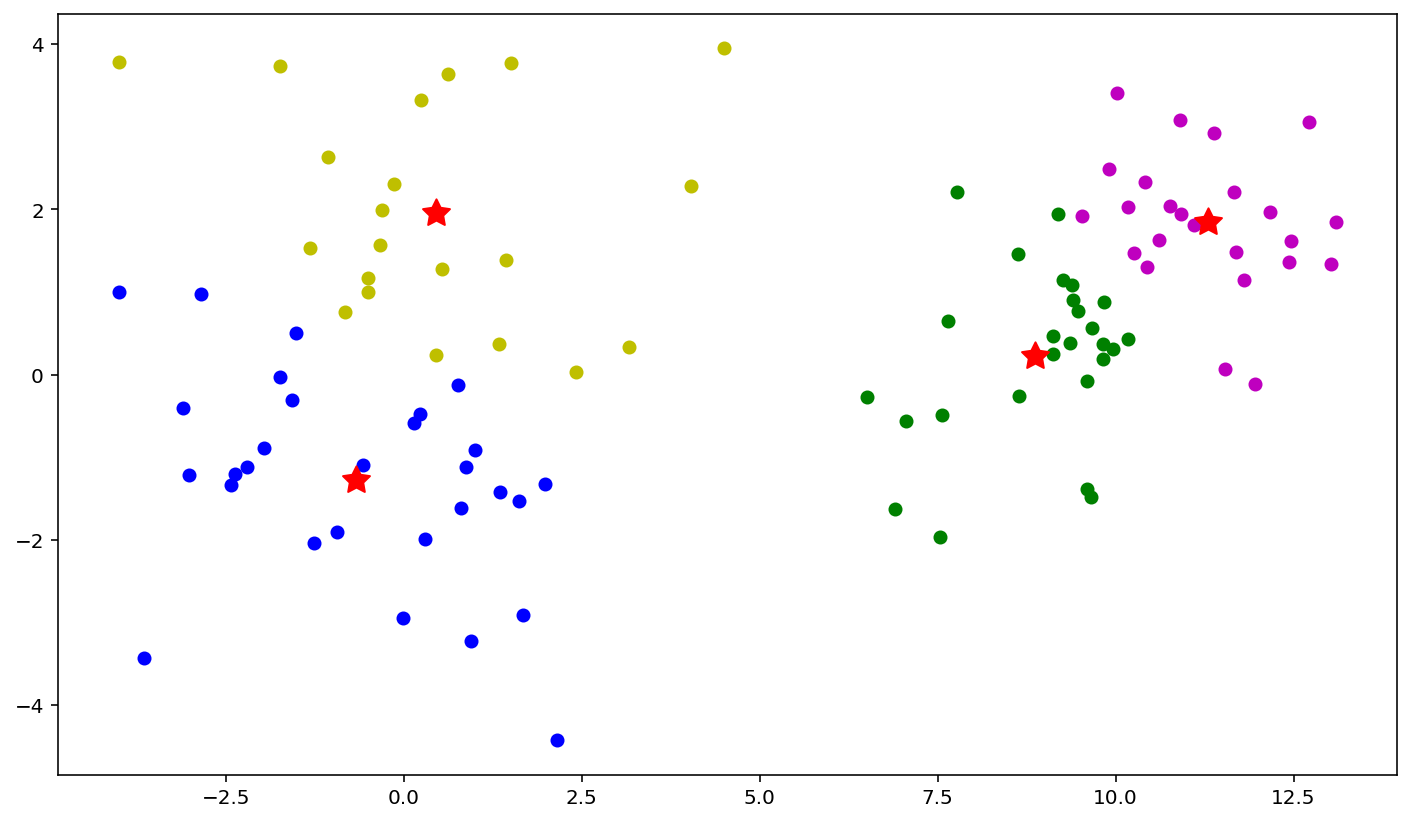

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

colors=[ 'g', 'b', 'm', 'y', 'k']

pts = 50
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([10, 1],
                                  [[2,1], [1, 2]],
                                  size=pts)
features = np.concatenate((a, b)) ## 2-dimensional features
# Find 2 clusters in the data
n_clusters = 4 ## the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)#kmeans(features, 3)

# Plot whitened data and cluster centers in red
means = kmeans.cluster_centers_
labels= kmeans.labels_
for k in range(n_clusters):
    idxs = [ii for ii in range(len(labels)) if labels[ii] == k]
    features_k = features[idxs]
    plt.scatter(features_k[:, 0], features_k[:, 1], c=colors[k])
plt.scatter(means[:, 0], means[:, 1], c='r', marker=(5,1), s=200)
plt.show()


## Image Segmentation
Image segmentation is a task to partition the image into some regions i.e. labeling the pixels in the image.
Segmentation is useful to change an image to be something more meaningful and easy to analyse. 

This is an example to segment an image based on the RGB values and the pixel locations.

<img src="segmentation.png" style="width:800px;height:500px;"/>

## K-Means++ Algorithm:


    1. Choose one center uniformly at random from among the data points.
    2. For each datapoint, compute the distance between the datapoint and the nearest center that has already been chosen.
    3. Choose one new data point at random as a new center, using a weighted probability distribution.
    4. Repeat Steps 2 and 3 until K centroids have been chosen.
    5. Proceed using standard k-means clustering.
   

## Principal Component Analysis (PCA)

PCA is one of the dimensionality reduction techniques $f:\mathbb{R}^D \to \mathbb{R}^k$ where $k < D$. 
The idea is to project the datapoints onto the best fitting line.  


An example of datapoints from normal distributions with two principal components:

<img src="1200px-GaussianScatterPCA.png" width="250" height="250"/>

Source: Wikipedia



Assume there are $N$ datapoints (2-dimension) $\boldsymbol{X} \in \mathbb{R}^{2\times N}$ and $\boldsymbol{u}$ is a unit vector such that datapoints are projected onto this vector.


The best fitting line can be computed by maximising variance is computed as follows:

$\max_{\boldsymbol{u}} \boldsymbol{u}^\top\boldsymbol{X}\boldsymbol{X}^\top\boldsymbol{u}$


Some points to note from PCA:

    1. It does not require labels 
    2. The variance of the projected data is maximised
    3. Repeating to find the best fitting line yields an orthogonal basis.
    
    

PCA target is to decorrelate elements on the feature. 
To this end, we need to project the datapoints and the covariance of the transformed datapoints is a diagonal matrix.   
    
### A step by step PCA algorithm:
    1. Subtract the datapoints by their mean
    2. Compute the covariance matrix
    3. Compute eigenvectors and eigenvalues of the covariance matrix
    4. Rank eigenvectors by its corresponding eigenvalues (descending order)
    5. Obtain the projection matrix with its column vectors corresponding to the top-k eigenvectors
    
    

###### Covariance 
PCA requires to compute a covariance matrix of $\boldsymbol{X}$:

$\boldsymbol{C} = \frac{1}{N-1}(\boldsymbol{X}-\boldsymbol{\bar{X}})(\boldsymbol{X}-\boldsymbol{\bar{X}})^\top$, 

where $\boldsymbol{\bar{X}}$ is the average of $\boldsymbol{X}$.



###### Decompose the covariance matrix:

$\boldsymbol{C} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{U}^\top$, where $\boldsymbol{U}^\top\boldsymbol{U} = \textbf{I}$.


###### Projection 
Project the datapoints:

   $\boldsymbol{Y} = \boldsymbol{W}^\top\boldsymbol{X}$, where $\boldsymbol{W} = \boldsymbol{U}_k$




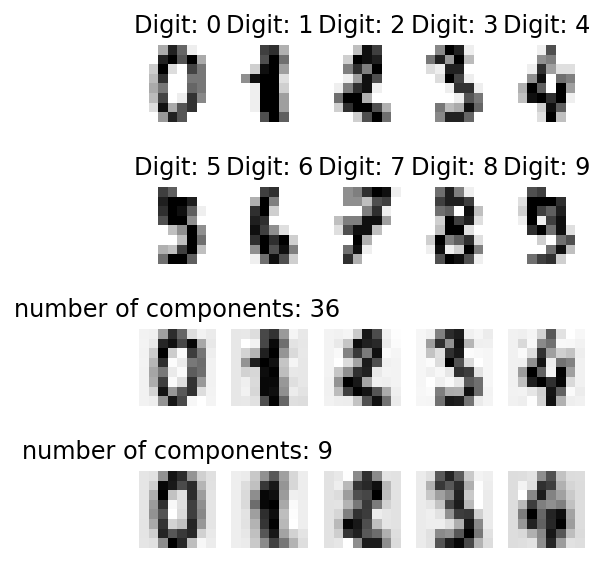

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

digits = load_digits()

_, axes = plt.subplots(4, 5 , figsize=(4,5))
images_and_labels = list(zip(digits.images, digits.target))
n_samples, h, w = digits.images.shape
data = digits.images.reshape((n_samples, -1))


for ax, (image, label) in zip(axes[0, :], images_and_labels[:5]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit: %i' % label)
    ax.set_axis_off()

for ax, (image, label) in zip(axes[1, :], images_and_labels[5:10]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit: %i' % label)
    ax.set_axis_off()
        

X_train, _, y_train, _ = train_test_split(data, digits.target, test_size=0.5, shuffle=False)



############################ 36 components ############################
new_h, new_w = 6, 6
pca = PCA(n_components=new_h*new_w)
projected_X = pca.fit_transform(X_train)
projected_X = pca.inverse_transform(projected_X)
projected_X_displays = projected_X.reshape((X_train.shape[0], h, w))

axes[2,0].set_title('number of components: 36')
for ax, (image) in zip(axes[2, :], projected_X_displays[:10]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_axis_off()

############################ 9 components ############################
new_h, new_w = 3, 3
pca = PCA(n_components=new_h*new_w)
projected_X = pca.fit_transform(X_train)
projected_X = pca.inverse_transform(projected_X)
projected_X_displays = projected_X.reshape((X_train.shape[0], h, w))

axes[3,0].set_title('number of components: 9')
for ax, (image) in zip(axes[3, :], projected_X_displays[:10]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_axis_off()





In [5]:
sampled_X = X_train[:10] # 10, 64

covariance = sampled_X.T @ sampled_X
U, S, V = np.linalg.svd(covariance)
print(S)


[2.76082588e+04 2.93717749e+03 2.24179638e+03 1.60796429e+03
 1.10611727e+03 8.13713753e+02 6.27226863e+02 5.69466644e+02
 3.83753729e+02 1.98524819e+02 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 2.65848691e-12
 2.65848691e-12 2.65848691e-12 2.65848691e-12 3.77699083e-13]
